In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data preprocessing/2customer_support_tickets.csv")
data.head()

,Ticket Type,Ticket Description
0,Technical issue,I'm having an issue with the {product_purchase...
1,Technical issue,I'm having an issue with the {product_purchase...
2,Technical issue,I'm facing a problem with my {product_purchase...
3,Billing inquiry,I'm having an issue with the {product_purchase...
4,Billing inquiry,I'm having an issue with the {product_purchase...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ticket Type         8469 non-null   object
 1   Ticket Description  8469 non-null   object
dtypes: object(2)
memory usage: 132.5+ KB


In [4]:
data.describe()

,Ticket Type,Ticket Description
count,8469,8469
unique,5,8077
top,Refund request,I'm having an issue with the {product_purchase...
freq,1752,25


In [21]:
# Drop duplicates in the 'Ticket Description' column
data = data.drop_duplicates(subset=['Ticket Description']).reset_index(drop=True)

In [38]:
data

,Ticket Type,Ticket Description
0,Technical issue,I'm having an issue with the {product_purchase...
1,Technical issue,I'm having an issue with the {product_purchase...
2,Technical issue,I'm facing a problem with my {product_purchase...
3,Billing inquiry,I'm having an issue with the {product_purchase...
4,Billing inquiry,I'm having an issue with the {product_purchase...
...,...,...
8072,Product inquiry,My {product_purchased} is making strange noise...
8073,Technical issue,I'm having an issue with the {product_purchase...
8074,Technical issue,I'm having an issue with the {product_purchase...
8075,Product inquiry,I'm having an issue with the {product_purchase...


In [41]:
import re
def text_cleaning(text):
    exclude = '!"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'
    pattern = text.translate(str.maketrans("","",exclude))
    pattern = re.sub('[^a-zA-Z]',' ',pattern)
    pattern = " ".join(pattern.split()).lower()
    return pattern

In [42]:
data['clean Ticket Description'] = data['Ticket Description'].apply(lambda x :text_cleaning(x))

In [43]:
for i in 

,Ticket Type,Ticket Description,clean Ticket Description
0,Technical issue,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
1,Technical issue,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
2,Technical issue,I'm facing a problem with my {product_purchase...,im facing a problem with my productpurchased t...
3,Billing inquiry,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
4,Billing inquiry,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
...,...,...,...
8072,Product inquiry,My {product_purchased} is making strange noise...,my productpurchased is making strange noises a...
8073,Technical issue,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
8074,Technical issue,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
8075,Product inquiry,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...


In [47]:
for i in range(0,len(data['clean Ticket Description'])):
    if "im having an issue with the productpurchased please assist" in data['clean Ticket Description'][i]:
        data['clean Ticket Description'][i] = data['clean Ticket Description'][i][59:]

In [48]:
data

,Ticket Type,Ticket Description,clean Ticket Description
0,Technical issue,I'm having an issue with the {product_purchase...,your billing zip code is we appreciate that yo...
1,Technical issue,I'm having an issue with the {product_purchase...,if you need to change an existing product im h...
2,Technical issue,I'm facing a problem with my {product_purchase...,im facing a problem with my productpurchased t...
3,Billing inquiry,I'm having an issue with the {product_purchase...,if you have a problem youre interested in and ...
4,Billing inquiry,I'm having an issue with the {product_purchase...,note the seller is not responsible for any dam...
...,...,...,...
8072,Product inquiry,My {product_purchased} is making strange noise...,my productpurchased is making strange noises a...
8073,Technical issue,I'm having an issue with the {product_purchase...,sell for i also bought a mm and im getting stu...
8074,Technical issue,I'm having an issue with the {product_purchase...,you are using a different browser than the one...
8075,Product inquiry,I'm having an issue with the {product_purchase...,i dont think a product is in the same category...


In [56]:
import re
from nltk.corpus import stopwords

# Define the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords using regex
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply to the 'Ticket Description' column
data['2clean Ticket Description'] = data['clean Ticket Description'].apply(remove_stopwords)


In [57]:
data

,Ticket Type,Ticket Description,clean Ticket Description,2clean Ticket Description
0,Technical issue,I'm having an issue with the {product_purchase...,your billing zip code is we appreciate that yo...,billing zip code appreciate requested website ...
1,Technical issue,I'm having an issue with the {product_purchase...,if you need to change an existing product im h...,need change existing product im issue productp...
2,Technical issue,I'm facing a problem with my {product_purchase...,im facing a problem with my productpurchased t...,im facing problem productpurchased productpurc...
3,Billing inquiry,I'm having an issue with the {product_purchase...,if you have a problem youre interested in and ...,problem youre interested id love see happen pl...
4,Billing inquiry,I'm having an issue with the {product_purchase...,note the seller is not responsible for any dam...,note seller responsible damages arising delive...
...,...,...,...,...
8072,Product inquiry,My {product_purchased} is making strange noise...,my productpurchased is making strange noises a...,productpurchased making strange noises functio...
8073,Technical issue,I'm having an issue with the {product_purchase...,sell for i also bought a mm and im getting stu...,sell also bought mm im getting stuck buy issue...
8074,Technical issue,I'm having an issue with the {product_purchase...,you are using a different browser than the one...,using different browser one im using ive perfo...
8075,Product inquiry,I'm having an issue with the {product_purchase...,i dont think a product is in the same category...,dont think product category productpurchased w...


In [58]:
data['ticket len'] = [len(i) for i in data['2clean Ticket Description']]

In [59]:
data

,Ticket Type,Ticket Description,clean Ticket Description,2clean Ticket Description,ticket len
0,Technical issue,I'm having an issue with the {product_purchase...,your billing zip code is we appreciate that yo...,billing zip code appreciate requested website ...,156
1,Technical issue,I'm having an issue with the {product_purchase...,if you need to change an existing product im h...,need change existing product im issue productp...,142
2,Technical issue,I'm facing a problem with my {product_purchase...,im facing a problem with my productpurchased t...,im facing problem productpurchased productpurc...,170
3,Billing inquiry,I'm having an issue with the {product_purchase...,if you have a problem youre interested in and ...,problem youre interested id love see happen pl...,144
4,Billing inquiry,I'm having an issue with the {product_purchase...,note the seller is not responsible for any dam...,note seller responsible damages arising delive...,181
...,...,...,...,...,...
8072,Product inquiry,My {product_purchased} is making strange noise...,my productpurchased is making strange noises a...,productpurchased making strange noises functio...,189
8073,Technical issue,I'm having an issue with the {product_purchase...,sell for i also bought a mm and im getting stu...,sell also bought mm im getting stuck buy issue...,114
8074,Technical issue,I'm having an issue with the {product_purchase...,you are using a different browser than the one...,using different browser one im using ive perfo...,121
8075,Product inquiry,I'm having an issue with the {product_purchase...,i dont think a product is in the same category...,dont think product category productpurchased w...,151


In [64]:
ticket_type = ['Refund request','Technical issue','Cancellation request','Product inquiry','Billing inquiry'] 

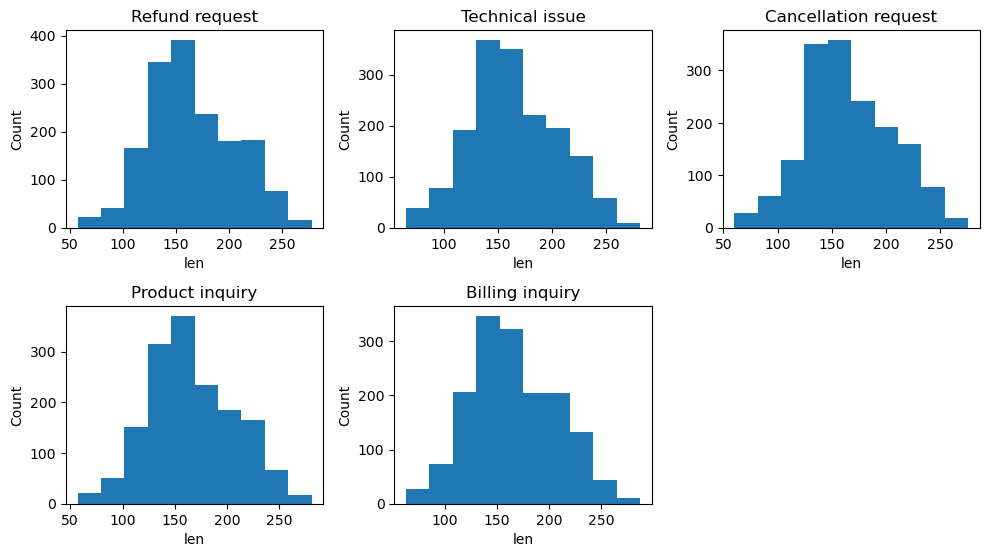

In [70]:
# Set the figure size for the entire plot
plt.figure(figsize=(10, 8))

# Loop to create subplots for each ticket type
for i in range(5):
    plt.subplot(3, 3, i + 1)  # 3x3 grid, place each histogram in the next subplot
    plt.hist(data[data['Ticket Type'] == ticket_type[i]]['ticket len'])
    plt.title(ticket_type[i])
    plt.xlabel('len')
    plt.ylabel('Count')

# Display the final plot
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()


In [63]:
data['Ticket Type'].value_counts()

Refund request          1659
Technical issue         1651
Cancellation request    1619
Product inquiry         1577
Billing inquiry         1571
Name: Ticket Type, dtype: int64

In [71]:
updated_dataset = data[['Ticket Type','2clean Ticket Description']]

In [72]:
updated_dataset

,Ticket Type,2clean Ticket Description
0,Technical issue,billing zip code appreciate requested website ...
1,Technical issue,need change existing product im issue productp...
2,Technical issue,im facing problem productpurchased productpurc...
3,Billing inquiry,problem youre interested id love see happen pl...
4,Billing inquiry,note seller responsible damages arising delive...
...,...,...
8072,Product inquiry,productpurchased making strange noises functio...
8073,Technical issue,sell also bought mm im getting stuck buy issue...
8074,Technical issue,using different browser one im using ive perfo...
8075,Product inquiry,dont think product category productpurchased w...


In [77]:
updated_dataset = updated_dataset.drop_duplicates(subset=['2clean Ticket Description']).reset_index(drop=True)

In [78]:
updated_dataset.to_csv('Customer Inquiry dataset.csv', index=False)